In [3]:
import pandas as pd
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.insert(0, '/home/was966/Research/PSOG/')
from gdd.correlation import pairwise_correlation
from gdd.combination import pairwise_combination
from gdd.score import Xy_score

In [4]:
data_path = '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/735'

tcga_tpm = pd.read_pickle(os.path.join(data_path, 'TPM.TCGA.TABLE'))
itrp_tpm = pd.read_pickle(os.path.join(data_path, 'TPM.ITRP.TABLE'))
tcga_patient = pd.read_pickle(os.path.join(data_path, 'PATIENT.TCGA.TABLE'))
tcga_patient['cohort'] = tcga_patient.cancer_type
itrp_patient = pd.read_pickle(os.path.join(data_path, 'PATIENT.ITRP.TABLE'))
gene = pd.read_pickle(os.path.join(data_path, 'GENE.TABLE'))


In [5]:
X = tcga_tpm.values
# corrmatrix = pairwise_correlation(X, n_cpus=6, method='correlation')

In [16]:
itrp_tpm_diff = pairwise_combination(itrp_tpm, combination_pairs = [('TOLLIP', 'PIK3CD'), ('RUNX3','SERPINB2'), ('PIK3CD','GTF3C1'), ('IL6R', 'MAP2K2')], n_cpus=1)

100%|##########| 4/4 [00:00<00:00, 1201.38it/s]


In [43]:
df1 = (-itrp_tpm_diff).join(itrp_patient[['Freeman_response']])

In [44]:
Xy_score(df1, 'Freeman_response',  method='prc')

100%|##########| 4/4 [00:00<00:00, 2508.56it/s]


,prc
gene_name,
TOLLIP-PIK3CD,0.650567
RUNX3-SERPINB2,0.337325
PIK3CD-GTF3C1,0.349611
IL6R-MAP2K2,0.362600


In [19]:
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.metrics import auc as prc_auc_score
from sklearn.feature_selection import mutual_info_classif

In [32]:
score = mutual_info_classif(-df1[['TOLLIP-PIK3CD', 'RUNX3-SERPINB2', 'PIK3CD-GTF3C1', 'IL6R-MAP2K2']].values, 
                    df1.Freeman_response.map({'R':1, 'NR':0}), random_state=123)

100%|##########| 4/4 [00:00<00:00, 2466.51it/s]


,prc
gene_name,
TOLLIP-PIK3CD,0.650567
RUNX3-SERPINB2,0.337325
PIK3CD-GTF3C1,0.349611
IL6R-MAP2K2,0.362600


In [24]:
itrp_tpm[['TOLLIP', 'PIK3CD']]

,TOLLIP,PIK3CD
Patient100_T_P,2.526069,6.162693
Patient102_T_P,2.592158,3.121015
Patient105_T_P,1.169925,1.536053
Patient106_T_P,2.153805,2.750607
Patient10_T_M,2.891419,3.581351
...,...,...
Pt94_Pre_AD732850,4.702658,5.183089
Pt98_Pre_AD733586,4.831877,2.821710
Pt101_Pre_AD486328,4.444932,5.672142
Pt103_Pre_AE134058,3.676944,2.521051


In [31]:
-df1['TOLLIP-PIK3CD']

Patient100_T_P        3.636625
Patient102_T_P        0.528857
Patient105_T_P        0.366128
Patient106_T_P        0.596801
Patient10_T_M         0.689932
                        ...   
Pt94_Pre_AD732850     0.480432
Pt98_Pre_AD733586    -2.010167
Pt101_Pre_AD486328    1.227210
Pt103_Pre_AE134058   -1.155894
Pt106_Pre_AD502250   -1.425194
Name: TOLLIP-PIK3CD, Length: 334, dtype: float64

In [22]:
Xy_score(df1, 'Freeman_response', method='prc',)

100%|##########| 4/4 [00:00<00:00, 2679.21it/s]


,prc
gene_name,
TOLLIP-PIK3CD,0.313189
RUNX3-SERPINB2,0.526713
PIK3CD-GTF3C1,0.549737
IL6R-MAP2K2,0.493955


In [14]:
Xy_score(df1, 'Freeman_response', method='mic',)

100%|##########| 4/4 [00:00<00:00, 2352.72it/s]


,mic
gene_name,
PIK3CD-TOLLIP,0.040215
RUNX3-SERPINB2,0.000423
PIK3CD-GTF3C1,0.002100
IL6R-MAP2K2,0.025935


In [2]:
df1[['PIK3CD-TOLLIP', 'RUNX3-SERPINB2', 'PIK3CD-GTF3C1', 'IL6R-MAP2K2']].values.reshape(-1,4)

NameError: name 'df1' is not defined

In [1]:
recall

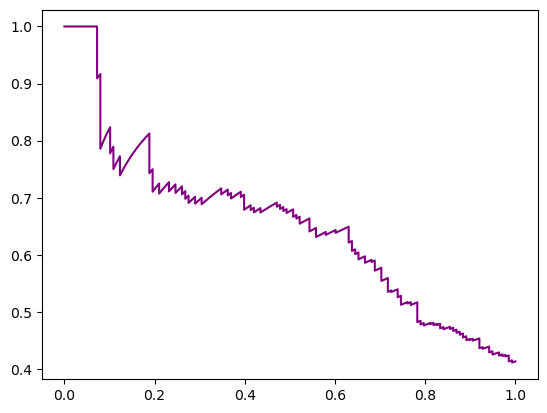

In [25]:
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')